In [160]:
!pip install wbdata

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata

In [162]:
data = pd.read_csv('/Users/bharathbeeravelly/Desktop/End-to-End-ML-Project/data/Train.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [163]:
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [164]:
data.shape

(4809, 23)

In [165]:
# Checking about the country
print(f'Countries tourists come from: {data.country.unique()}')
print(f'Total no of countries: {len(data.country.unique())}')
print(f'No of tourists from each country: {data.country.value_counts()}')
print(f'No. of null values: {data.country.isna().sum()}')

unique_countries = data.country.unique()

Countries tourists come from: ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE' 'SUDAN' 'COSTARICA' 'CHILE' 'NAMIBIA' 'TAIWAN'
 'SERBIA' '

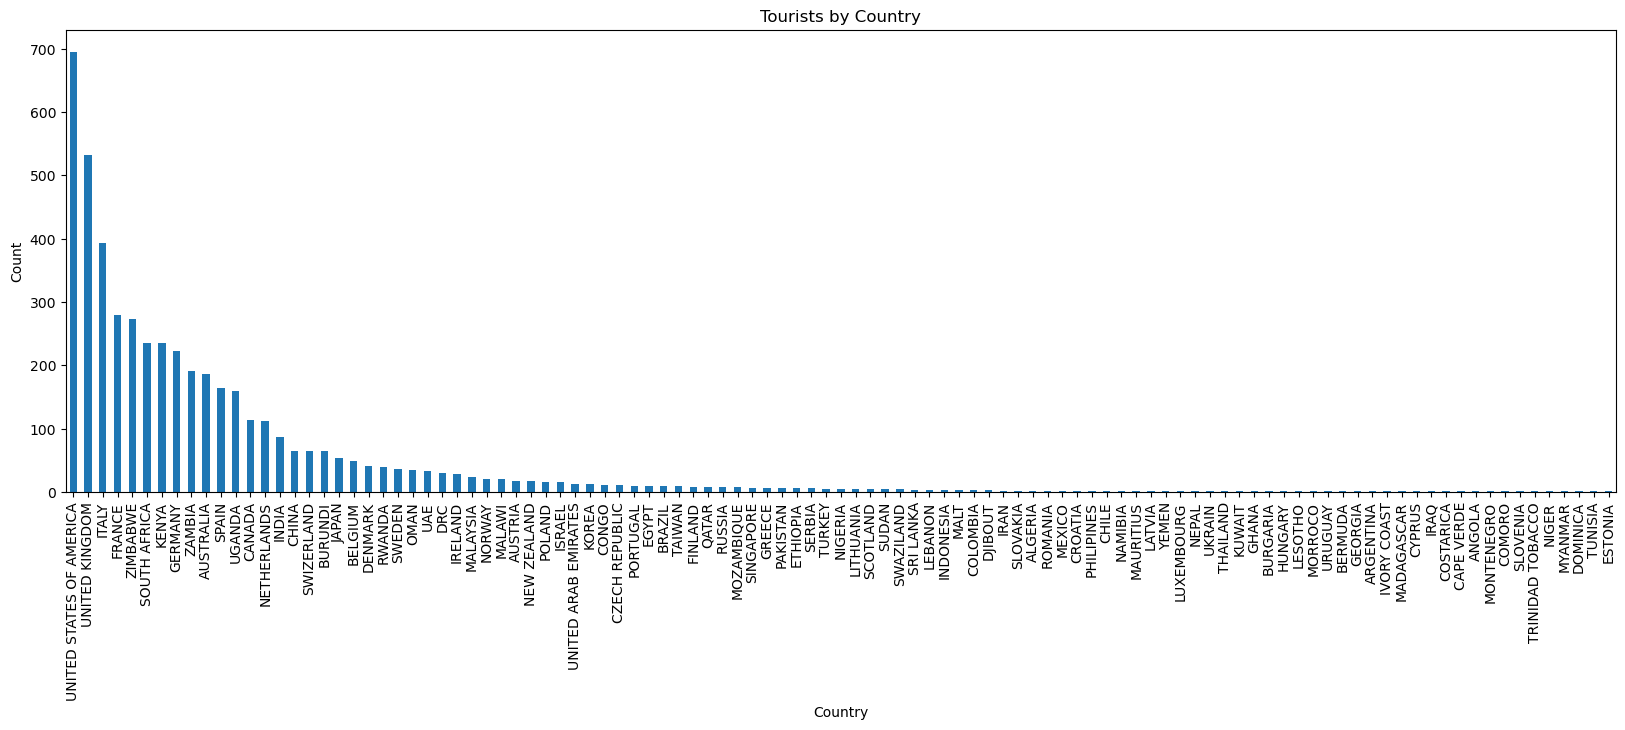

In [166]:
plt.figure(figsize=(20, 6))
data.country.value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Tourists by Country')
plt.show()


In [167]:
countries = wbdata.get_country(country_id='all')
df_countries = pd.DataFrame(countries)

In [168]:
unique_countries = pd.Series(unique_countries).str.title()
unique_countries

0                    Swizerland
1                United Kingdom
2                         China
3                  South Africa
4      United States Of America
                 ...           
100                     Uruguay
101                     Morroco
102                    Thailand
103                     Bermuda
104                     Estonia
Length: 105, dtype: object

In [169]:
country_keys_not_found = []
country_keys = {}
for country in unique_countries:
    if country not in df_countries['name'].values:
        country_keys_not_found.append(country)
    else:
        country_keys[country] = df_countries[df_countries['name'] == country]['id'].values[0]

In [170]:
country_keys['Swizerland'] = 'CHE'
country_keys_not_found.remove('Swizerland')

country_keys['United States Of America'] = 'USA'
country_keys_not_found.remove('United States Of America')

country_keys['Malt'] = 'MLT'
country_keys_not_found.remove('Malt')

country_keys['Egypt'] = 'EGY'
country_keys_not_found.remove('Egypt')

country_keys['Uae'] = 'ARE'
country_keys_not_found.remove('Uae')

country_keys['Yemen'] = 'YEM'
country_keys_not_found.remove('Yemen')

country_keys['Congo'] = 'COG'
country_keys_not_found.remove('Congo')

country_keys['Burgaria'] = 'BGR'
country_keys_not_found.remove('Burgaria')

country_keys['Drc'] = 'COD'
country_keys_not_found.remove('Drc')

country_keys['Korea'] = 'KOR'
country_keys_not_found.remove('Korea')

country_keys['Swaziland'] = 'SWZ'
country_keys_not_found.remove('Swaziland')

country_keys['Czech Republic'] = 'CZE'
country_keys_not_found.remove('Czech Republic')

country_keys['Ukrain'] = 'UKR'
country_keys_not_found.remove('Ukrain')

country_keys['Russia'] = 'RUS'
country_keys_not_found.remove('Russia')

country_keys['Slovakia'] = 'SVK'
country_keys_not_found.remove('Slovakia')

country_keys['Cape Verde'] = 'CPV'           
country_keys_not_found.remove('Cape Verde')

country_keys['Costarica'] = 'CRI'
country_keys_not_found.remove('Costarica')

country_keys['Turkey'] = 'TUR'
country_keys_not_found.remove('Turkey')

country_keys['Trinidad Tobacco'] = 'TTO'
country_keys_not_found.remove('Trinidad Tobacco')

country_keys['Comoro'] = 'COM'
country_keys_not_found.remove('Comoro')

country_keys['Iran'] = 'IRN'
country_keys_not_found.remove('Iran')

country_keys['Philipines'] = 'PHL'
country_keys_not_found.remove('Philipines')

country_keys['Ivory Coast'] = 'CIV'
country_keys_not_found.remove('Ivory Coast')

country_keys['Djibout'] = 'DJI'
country_keys_not_found.remove('Djibout')

country_keys['Morroco'] = 'MAR'
country_keys_not_found.remove('Morroco')

In [171]:
country_keys_not_found

['Scotland', 'Taiwan']

In [172]:
data['country'] = data['country'].str.title()


In [173]:
data['country'] = data['country'].replace('Scotland', 'United Kingdom')
data['country'] = data['country'].replace('Taiwan', 'China')
country_keys_not_found.remove('Scotland')
country_keys_not_found.remove('Taiwan')

In [174]:
data['country_code'] = data['country'].map(country_keys)
cols = list(data.columns)
cols.remove('country_code')
cols.insert(2, 'country_code')
data = data[cols]


In [175]:
data.head()

,ID,country,country_code,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [187]:
import wbdata

# Set the desired indicators and countries
indicators = {'NY.GDP.PCAP.CD': 'GDP per capita (current US$)'}
countries = ['USA']  # Replace with your desired countries

# Get the GDP data
df_gdp = wbdata.get_dataframe(indicators, country=countries)

# Get the latest available year
latest_year = df_gdp.head(1)

# Print the dataframe with the latest available year
print(latest_year)


      GDP per capita (current US$)
date                              
2022                  76329.582265


In [190]:
gdp_per_capita = {}

for country, code in country_keys.items():
    gdp_per_capita[code] = wbdata.get_dataframe(indicators, country=code).head(1)

gdp_per_capita


{'GBR':       GDP per capita (current US$)
 date                              
 2022                  46125.255751,
 'CHN':       GDP per capita (current US$)
 date                              
 2022                  12720.216318,
 'ZAF':       GDP per capita (current US$)
 date                              
 2022                   6766.481254,
 'NGA':       GDP per capita (current US$)
 date                              
 2022                   2162.633734,
 'IND':       GDP per capita (current US$)
 date                              
 2022                   2410.888021,
 'BRA':       GDP per capita (current US$)
 date                              
 2022                   8917.674911,
 'CAN':       GDP per capita (current US$)
 date                              
 2022                  54917.662523,
 'MOZ':       GDP per capita (current US$)
 date                              
 2022                    558.298606,
 'RWA':       GDP per capita (current US$)
 date                        

In [195]:
df_gdp.head(1)

,GDP per capita (current US$)
date,
2022,76329.582265
